Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
Stud_perform = pd.read_csv("StudentPerformance.csv")

In [3]:
Stud_perform.isnull()

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False


In [4]:
series = pd.isnull(Stud_perform["Math Score"])
Stud_perform[series]

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
7,F,NaN,72.0,83,81.0,2015,6,Urban


In [5]:
Stud_perform.notnull()

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,False,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,False
5,True,True,True,True,False,True,True,True
6,True,True,True,True,True,True,True,True
7,True,False,True,True,True,True,True,True


In [6]:
series = pd.notnull(Stud_perform["Math Score"])
Stud_perform[series]

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
Stud_perform['Gender'] = le.fit_transform(Stud_perform['Gender'])
newStud_perform = Stud_perform
Stud_perform

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,1,65.0,58.0,62,60.0,2022,3,Rural
1,0,72.0,60.0,65,63.0,2021,4,Urban
2,1,79.0,NaN,68,66.0,2020,2,Rural
3,0,86.0,64.0,71,69.0,2019,4,Urban
4,1,93.0,66.0,74,72.0,2018,5,NaN
5,0,100.0,68.0,77,NaN,2017,3,Urban
6,1,107.0,70.0,80,78.0,2016,5,Rural
7,0,NaN,72.0,83,81.0,2015,6,Urban


In [15]:
missing_values = ["Na", "na"]
Stud_perform = pd.read_csv("StudentPerformance.csv", na_values =
missing_values)
Stud_perform

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural
7,F,NaN,72.0,83,81.0,2015,6,Urban


In [18]:
Stud_perform = pd.read_csv("StudentPerformance.csv")
Stud_perform
newStud_perform=Stud_perform
newStud_perform.fillna(0)

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,0.0,68,66.0,2020,2,Rural
3,F,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,66.0,74,72.0,2018,5,0
5,F,100.0,68.0,77,0.0,2017,3,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural
7,F,0.0,72.0,83,81.0,2015,6,Urban


In [9]:
m_v=Stud_perform['Math Score'].mean()
Stud_perform['Math Score'].fillna(value=m_v, inplace=True)
Stud_perform

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,1,65.0,58.0,62,60.0,2022,3,Rural
1,0,72.0,60.0,65,63.0,2021,4,Urban
2,1,79.0,NaN,68,66.0,2020,2,Rural
3,0,86.0,64.0,71,69.0,2019,4,Urban
4,1,93.0,66.0,74,72.0,2018,5,NaN
5,0,100.0,68.0,77,NaN,2017,3,Urban
6,1,107.0,70.0,80,78.0,2016,5,Rural
7,0,86.0,72.0,83,81.0,2015,6,Urban


In [19]:
newStud_perform.replace(to_replace = np.nan, value = -99)

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,-99.0,68,66.0,2020,2,Rural
3,F,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,66.0,74,72.0,2018,5,-99
5,F,100.0,68.0,77,-99.0,2017,3,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural
7,F,-99.0,72.0,83,81.0,2015,6,Urban


In [20]:
Stud_perform = pd.read_csv("StudentPerformance.csv")
Stud_perform
newStud_perform.dropna()

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
3,F,86.0,64.0,71,69.0,2019,4,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural


In [21]:
newStud_perform.dropna(how='all')

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural
7,F,NaN,72.0,83,81.0,2015,6,Urban


In [22]:
newStud_perform.dropna(axis = 1)

,Gender,Writing Score,Club Join Year,Placement Offer Count
0,M,62,2022,3
1,F,65,2021,4
2,M,68,2020,2
3,F,71,2019,4
4,M,74,2018,5
5,F,77,2017,3
6,M,80,2016,5
7,F,83,2015,6


In [23]:
new_data = newStud_perform.dropna(axis = 0, how ='any')
new_data

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,60.0,65,63.0,2021,4,Urban
3,F,86.0,64.0,71,69.0,2019,4,Urban
6,M,107.0,70.0,80,78.0,2016,5,Rural


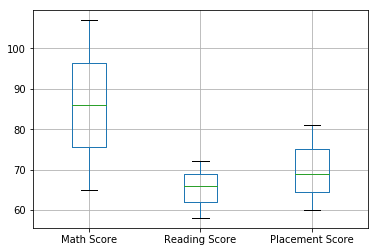

In [29]:
col = ['Math Score', 'Reading Score','Placement Score']
Stud_perform.boxplot(col)
plt.show()

In [12]:
print(np.where(Stud_perform['Math Score']>90))
print(np.where(Stud_perform['Reading Score']>25))

(array([4, 5, 6]),)
(array([0, 1, 3, 4, 5, 6, 7]),)


In [13]:
Stud_perform

,Gender,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,1,65.0,58.0,62,60.0,2022,3,Rural
1,0,72.0,60.0,65,63.0,2021,4,Urban
2,1,79.0,NaN,68,66.0,2020,2,Rural
3,0,86.0,64.0,71,69.0,2019,4,Urban
4,1,93.0,66.0,74,72.0,2018,5,NaN
5,0,100.0,68.0,77,NaN,2017,3,Urban
6,1,107.0,70.0,80,78.0,2016,5,Rural
7,0,86.0,72.0,83,81.0,2015,6,Urban


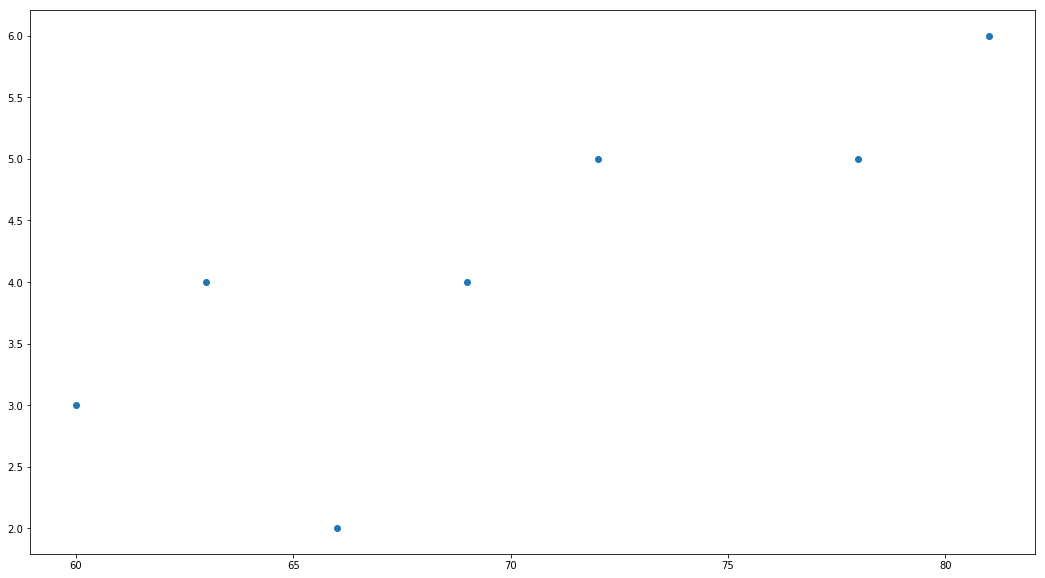

In [31]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(Stud_perform['Placement Score'], Stud_perform['Placement Offer Count'])
plt.show()

In [44]:
print(np.where((Stud_perform['Placement Score']<85) & (Stud_perform['Placement Score']>50) & (Stud_perform['Placement Offer Count']>1)))
print(np.where((Stud_perform['Placement Offer Count']<3)))

(array([0, 1, 2, 3, 4, 6, 7]),)
(array([2]),)


In [53]:
z = np.abs(stats.zscore(Stud_perform['Club Join Year']))
print(z)

[ 1.52752523  1.09108945  0.65465367  0.21821789  0.21821789  0.65465367
  1.09108945  1.52752523]


In [57]:
threshold = 1.6
sample_outliers = np.where(z <threshold)
sample_outliers

(array([0, 1, 2, 3, 4, 5, 6, 7]),)

In [62]:
sorted_rscore= sorted(Stud_perform['Club Join Year'])
sorted_rscore

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [74]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

(2016.75, 2020.25)


In [75]:
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

(2011.5, 2025.5)


In [76]:
r_outliers = []
for i in sorted_rscore:
    if (i<lwr_bound or i>upr_bound):
        r_outliers.append(i)
print(r_outliers)

[]


In [86]:
Stud_perform=pd.read_csv("StudentPerformance.csv")
Stud_perform_stud=Stud_perform
ninetieth_percentile = np.percentile(Stud_perform_stud['Math Score'], 90)
b = np.where(Stud_perform_stud['Math Score']>ninetieth_percentile,
ninetieth_percentile, Stud_perform_stud['Math Score'])
print("New array:",b)

('New array:', array([  65.,   72.,   79.,   86.,   93.,  100.,  107.,   nan]))


In [87]:
Stud_perform_stud.insert(1,"m score",b,True)
Stud_perform_stud

,Gender,m score,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,107.0,70.0,80,78.0,2016,5,Rural
7,F,NaN,NaN,72.0,83,81.0,2015,6,Urban


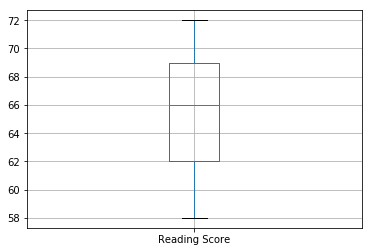

In [88]:
col = ['Reading Score']
Stud_perform.boxplot(col)
plt.show()

In [89]:
median=np.median(sorted_rscore)
median

2018.5

In [91]:
refined_Stud_perform=Stud_perform
refined_Stud_perform['Reading Score'] = np.where(refined_Stud_perform['Reading Score'] >upr_bound, median,refined_Stud_perform['Reading Score'])
refined_Stud_perform

,Gender,m score,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,107.0,70.0,80,78.0,2016,5,Rural
7,F,NaN,NaN,72.0,83,81.0,2015,6,Urban


In [92]:
refined_Stud_perform=Stud_perform
refined_Stud_perform['Reading Score'] = np.where(refined_Stud_perform['Reading Score'] >lwr_bound, median,refined_Stud_perform['Reading Score'])
refined_Stud_perform

,Gender,m score,Math Score,Reading Score,Writing Score,Placement Score,Club Join Year,Placement Offer Count,Region
0,M,65.0,65.0,58.0,62,60.0,2022,3,Rural
1,F,72.0,72.0,60.0,65,63.0,2021,4,Urban
2,M,79.0,79.0,NaN,68,66.0,2020,2,Rural
3,F,86.0,86.0,64.0,71,69.0,2019,4,Urban
4,M,93.0,93.0,66.0,74,72.0,2018,5,NaN
5,F,100.0,100.0,68.0,77,NaN,2017,3,Urban
6,M,107.0,107.0,70.0,80,78.0,2016,5,Rural
7,F,NaN,NaN,72.0,83,81.0,2015,6,Urban


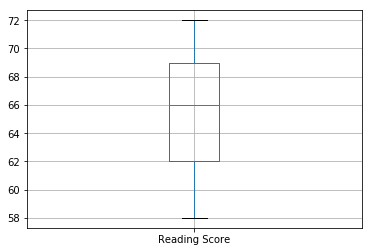

In [93]:
col = ['Reading Score']
refined_Stud_perform.boxplot(col)
plt.show()

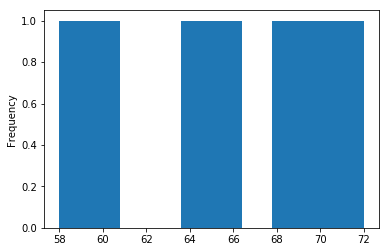

In [107]:
Stud_perform['Reading Score'].plot(kind = 'hist')
plt.show()

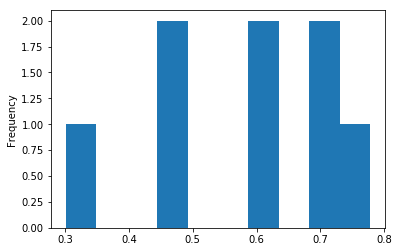

In [113]:
Stud_perform['log_math'] = np.log10(Stud_perform['Placement Offer Count'])
Stud_perform['log_math'].plot(kind = 'hist')
plt.show()